
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
---

<p style="text-align: center;">
<img src=http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg width=40%>
</p>

 Universidad Nacional de Córdoba

---

## Practico: Aprendizaje No Supervisado

### Importación de librerías 

In [38]:
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,MeanShift,DBSCAN 
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn import metrics

warnings.filterwarnings('ignore')

### Lectura de los datasets

In [39]:
df_orig_mensual = pd.read_parquet("preprocesado_no_supervisado_agrupado.parquet")

In [40]:
df_orig_mensual = df_orig_mensual.copy()

In [41]:
df = df_orig_mensual.drop(columns = ['anio_mes_cupon', 'client_edad', 'client_domicilio_codigo_postal'])

In [42]:
df_orig_diario = pd.read_parquet("preprocesado_no_supervisado_diario.parquet")

In [43]:
df_orig_diario = df_orig_diario.copy()

In [44]:
df_diario = df_orig_diario.drop(columns = ['anio_mes_cupon', 'client_edad', 'client_domicilio_codigo_postal'])

### Normalización de Atributos y PCA

#### Escalado

In [45]:
# Preprocessing
features = df.columns
features_diario = df_diario.columns
dni = 'dni_titular_movimiento'
target = 'fg_aumentado'

features = features[(features != dni) & (features != target)]
features_diario = features_diario[(features_diario != dni)]

In [46]:
len(features)

42

In [47]:
scaler = StandardScaler()
df_escalado = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
df_escalado_diario = pd.DataFrame(scaler.fit_transform(df_diario[features_diario]), columns=features_diario)
df_escalado = pd.merge(df[[dni, target]], df_escalado, left_index=True, right_index=True)
df_escalado_diario = pd.merge(df_diario[[dni]], df_escalado_diario, left_index=True, right_index=True)

### Reducción de dimensionalidad dataset mensual

In [48]:
# Fit
pca = PCA (n_components=None)
pca_result = pca.fit_transform(df_escalado[features])

In [49]:
pca_result.shape

(10128, 42)

In [50]:
pca.explained_variance_ratio_.round(2)

array([0.17, 0.07, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

<AxesSubplot:title={'center':'Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n'}>

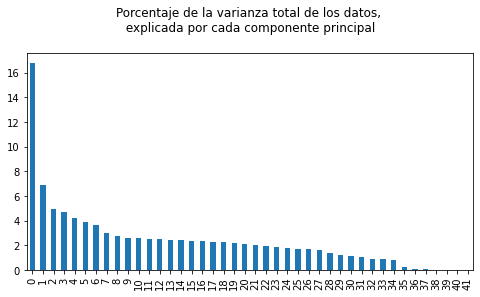

In [51]:
plt.figure(figsize=(8,4))
plt.title("Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n")
pd.Series(pca.explained_variance_ratio_.round(6)*100).plot(kind='bar')

In [52]:
acc_variance_percent = np.cumsum(np.round(pca.explained_variance_ratio_.round(2), decimals=4) * 100)
acc_variance_percent

array([ 17.,  24.,  29.,  34.,  38.,  42.,  46.,  49.,  52.,  55.,  58.,
        61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,
        83.,  85.,  87.,  89.,  91.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 100., 100., 100., 100., 100., 100., 100.])

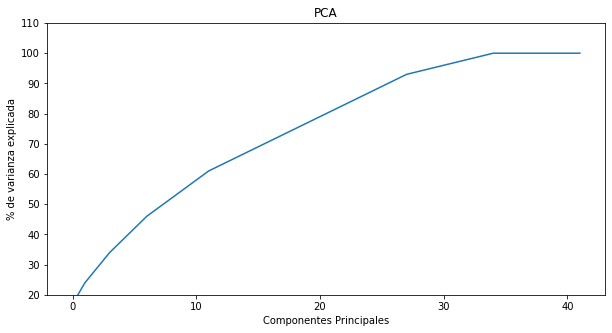

In [53]:
#plt.xticks(range(model['pca'].n_components))

plt.figure(figsize=(10, 5))
plt.ylabel('% de varianza explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.ylim(20, 110)
plt.xticks(pca.n_components)
plt.plot(acc_variance_percent)

In [54]:
pca_cols = [f'pca_{x}' for x in range(1,20)]
df_pca_final = pd.DataFrame(pca_result[:,:19], columns = pca_cols)
df_pca_final

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0     -2.172938 -0.308233  1.506251  0.197290 -0.118870 -0.085409 -0.336156   
1     -1.861384 -0.370582  1.394892  0.244533 -0.404208 -0.171829 -0.363350   
2     -1.877017 -0.375482  1.419741  0.241148 -0.392347 -0.172319 -0.355073   
3     -1.892649 -0.380383  1.444591  0.237763 -0.380486 -0.172810 -0.346796   
4     -1.908282 -0.385284  1.469440  0.234379 -0.368625 -0.173301 -0.338518   
...         ...       ...       ...       ...       ...       ...       ...   
10123  4.554080 -1.818086 -1.197495 -0.528243  1.180068  0.462852  1.692864   
10124  1.545434 -0.727974 -0.841720  0.284029 -1.907451 -0.367746  1.511578   
10125  0.592385 -0.372209 -0.522460  0.315424 -2.210050 -0.465656  1.645155   
10126 -0.858118 -0.220211 -0.324326 -0.120571 -0.247112  0.031925  2.661558   
10127 -2.407165  0.242100  0.717048 -0.055256  0.275782  0.244411  1.906773   

          pca_8     pca_9    pca_10    pca_11    pca_12    pca_13     pca_14  \
0     -0.002476  0.507725 -0.415513 -0.133621  0.151824 -0.575645  -0.501062   
1      0.076120  0.487026 -0.323531 -0.190155  0.070009 -0.466439  -0.463794   
2      0.096330  0.472174 -0.314812 -0.237062  0.021310 -0.358320  -0.474417   
3      0.116540  0.457323 -0.306094 -0.283968 -0.027390 -0.250201  -0.485039   
4      0.136750  0.442471 -0.297375 -0.330874 -0.076089 -0.142081  -0.495661   
...         ...       ...       ...       ...       ...       ...        ...   
10123 -1.280888 -0.268988 -1.563972 -0.476755  1.169929  0.301169  -0.114696   
10124 -0.490053 -0.755971 -0.280320  0.159807  0.381928  0.300278  -0.002874   
10125 -0.027132 -0.750016  0.463055  0.055032  0.101927  0.507197   0.224917   
10126  1.505922  0.689090 -0.869985  1.438139 -2.690005  6.500422  10.511854   
10127 -0.182034 -0.416611 -0.145394  0.091295  0.264965  0.704840  -0.249619   

          pca_15    pca_16    pca_17    pca_18    pca_19  
0       0.711840 -0.745799 -0.553676 -1.153545  0.399279  
1       0.633094 -0.657858 -0.466410 -0.971133  0.308996  
2       0.543499 -0.566162 -0.357077 -0.804571  0.245851  
3       0.453903 -0.474466 -0.247745 -0.638009  0.182707  
4       0.364308 -0.382770 -0.138412 -0.471447  0.119562  
...          ...       ...       ...       ...       ...  
10123  -0.492971  0.565743  1.942157 -0.638256 -0.430035  
10124  -0.201272  0.446719  0.767886 -0.143359 -0.710042  
10125  -0.143110  0.435463  0.257728  0.212326 -1.131044  
10126  13.241217 -0.501245  7.246561  0.994906  0.414336  
10127  -0.330083  0.540516  0.844665  0.298842 -0.783449  

[10128 rows x 19 columns]

In [55]:
df_pca = pd.merge(df[[dni, target]], df_pca_final, left_index=True, right_index=True)
df_pca

dni_titular_movimiento  fg_aumentado     pca_1     pca_2  \
0      000000b5aea2c9ea7cc155f6ebcef97f826             0 -2.172938 -0.308233   
1      000000b5aea2c9ea7cc155f6ebcef97f826             0 -1.861384 -0.370582   
2      000000b5aea2c9ea7cc155f6ebcef97f826             0 -1.877017 -0.375482   
3      000000b5aea2c9ea7cc155f6ebcef97f826             0 -1.892649 -0.380383   
4      000000b5aea2c9ea7cc155f6ebcef97f826             0 -1.908282 -0.385284   
...                                    ...           ...       ...       ...   
10123  000ef071e95351afc1149fa1afe4862a079             1  4.554080 -1.818086   
10124  000ef071e95351afc1149fa1afe4862a079             0  1.545434 -0.727974   
10125  000ef071e95351afc1149fa1afe4862a079             0  0.592385 -0.372209   
10126  000ef071e95351afc1149fa1afe4862a079             1 -0.858118 -0.220211   
10127  000ef071e95351afc1149fa1afe4862a079             0 -2.407165  0.242100   

          pca_3     pca_4     pca_5     pca_6     pca_7     pca_8  ...  \
0      1.506251  0.197290 -0.118870 -0.085409 -0.336156 -0.002476  ...   
1      1.394892  0.244533 -0.404208 -0.171829 -0.363350  0.076120  ...   
2      1.419741  0.241148 -0.392347 -0.172319 -0.355073  0.096330  ...   
3      1.444591  0.237763 -0.380486 -0.172810 -0.346796  0.116540  ...   
4      1.469440  0.234379 -0.368625 -0.173301 -0.338518  0.136750  ...   
...         ...       ...       ...       ...       ...       ...  ...   
10123 -1.197495 -0.528243  1.180068  0.462852  1.692864 -1.280888  ...   
10124 -0.841720  0.284029 -1.907451 -0.367746  1.511578 -0.490053  ...   
10125 -0.522460  0.315424 -2.210050 -0.465656  1.645155 -0.027132  ...   
10126 -0.324326 -0.120571 -0.247112  0.031925  2.661558  1.505922  ...   
10127  0.717048 -0.055256  0.275782  0.244411  1.906773 -0.182034  ...   

         pca_10    pca_11    pca_12    pca_13     pca_14     pca_15    pca_16  \
0     -0.415513 -0.133621  0.151824 -0.575645  -0.501062   0.711840 -0.745799   
1     -0.323531 -0.190155  0.070009 -0.466439  -0.463794   0.633094 -0.657858   
2     -0.314812 -0.237062  0.021310 -0.358320  -0.474417   0.543499 -0.566162   
3     -0.306094 -0.283968 -0.027390 -0.250201  -0.485039   0.453903 -0.474466   
4     -0.297375 -0.330874 -0.076089 -0.142081  -0.495661   0.364308 -0.382770   
...         ...       ...       ...       ...        ...        ...       ...   
10123 -1.563972 -0.476755  1.169929  0.301169  -0.114696  -0.492971  0.565743   
10124 -0.280320  0.159807  0.381928  0.300278  -0.002874  -0.201272  0.446719   
10125  0.463055  0.055032  0.101927  0.507197   0.224917  -0.143110  0.435463   
10126 -0.869985  1.438139 -2.690005  6.500422  10.511854  13.241217 -0.501245   
10127 -0.145394  0.091295  0.264965  0.704840  -0.249619  -0.330083  0.540516   

         pca_17    pca_18    pca_19  
0     -0.553676 -1.153545  0.399279  
1     -0.466410 -0.971133  0.308996  
2     -0.357077 -0.804571  0.245851  
3     -0.247745 -0.638009  0.182707  
4     -0.138412 -0.471447  0.119562  
...         ...       ...       ...  
10123  1.942157 -0.638256 -0.430035  
10124  0.767886 -0.143359 -0.710042  
10125  0.257728  0.212326 -1.131044  
10126  7.246561  0.994906  0.414336  
10127  0.844665  0.298842 -0.783449  

[10128 rows x 21 columns]

### Visualización mediante t-distributed Stochastic Neighbor Embedding

Visualizar los datos usando t-distributed Stochastic Neighbor Embedding.
* Se pueden sacar conclusiones del grafico?



#### Sobre el dataset agrupado mensual

In [56]:
df_tsne = df_escalado.drop(columns = [dni]) 

Instanciamos TSNE con los parametros que regularmente se usan

In [57]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15) 

In [58]:
X_tsne_all = tsne.fit_transform(df_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10128 samples in 0.001s...
[t-SNE] Computed neighbors for 10128 samples in 2.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10128
[t-SNE] Computed conditional probabilities for sample 2000 / 10128
[t-SNE] Computed conditional probabilities for sample 3000 / 10128
[t-SNE] Computed conditional probabilities for sample 4000 / 10128
[t-SNE] Computed conditional probabilities for sample 5000 / 10128
[t-SNE] Computed conditional probabilities for sample 6000 / 10128
[t-SNE] Computed conditional probabilities for sample 7000 / 10128
[t-SNE] Computed conditional probabilities for sample 8000 / 10128
[t-SNE] Computed conditional probabilities for sample 9000 / 10128
[t-SNE] Computed conditional probabilities for sample 10000 / 10128
[t-SNE] Computed conditional probabilities for sample 10128 / 10128
[t-SNE] Mean sigma: 1.149792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.252136
[t-SNE] KL 

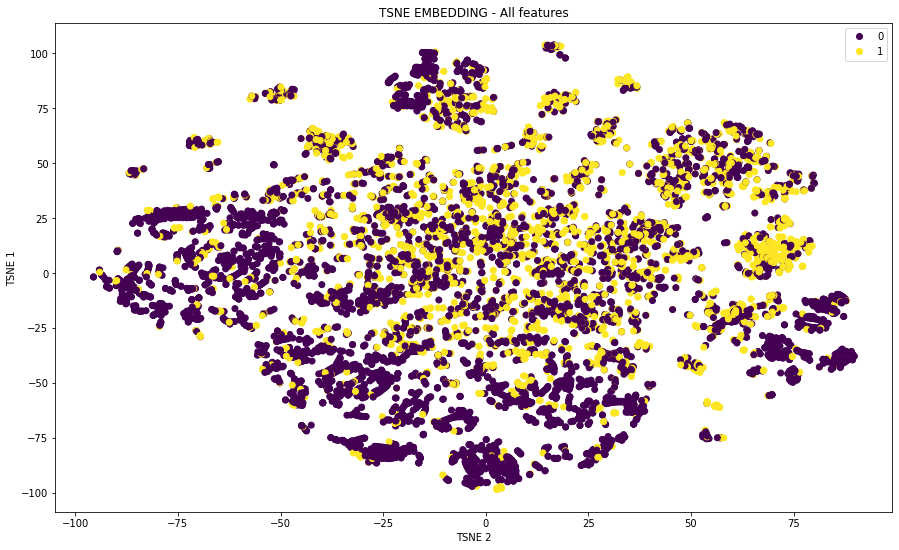

In [59]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1], c=df['fg_aumentado'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df['fg_aumentado'].unique())

El grafico anterior muestra todas las transacciones del dataset reducidas a dos dimensiones para poder visualizarlas. En principio habria ciertos grupos identificables. Sin tener en cuenta la etiqueta elegida, podemos observar ciertos conglomerados de puntos de distinta densidad, con forma de blob. 
Si tenemos en cuenta la etiqueta, a pesar de que ningún grupo tiene la completitud de una de las clases, si se pueden observan algunos con mayoría de puntos violetas o mayoría de amarillos. Aquellos conglomerados más amplios, tiene en su mayoría puntos de color de violetas, mientras que los más pequeños parecen tener mayoría de puntos amarillos.  

#### Sobre el dataset diario

In [62]:
df_tsne_diario = df_escalado_diario.drop(columns = [dni]) 

Instanciamos TSNE con los parametros que regularmente se usan

In [63]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15) 

In [64]:
X_tsne_diario = tsne.fit_transform(df_tsne_diario)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 65383 samples in 0.007s...
[t-SNE] Computed neighbors for 65383 samples in 103.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 65383
[t-SNE] Computed conditional probabilities for sample 2000 / 65383
[t-SNE] Computed conditional probabilities for sample 3000 / 65383
[t-SNE] Computed conditional probabilities for sample 4000 / 65383
[t-SNE] Computed conditional probabilities for sample 5000 / 65383
[t-SNE] Computed conditional probabilities for sample 6000 / 65383
[t-SNE] Computed conditional probabilities for sample 7000 / 65383
[t-SNE] Computed conditional probabilities for sample 8000 / 65383
[t-SNE] Computed conditional probabilities for sample 9000 / 65383
[t-SNE] Computed conditional probabilities for sample 10000 / 65383
[t-SNE] Computed conditional probabilities for sample 11000 / 65383
[t-SNE] Computed conditional probabilities for sample 12000 / 65383
[t-SNE] Computed conditional probabilities for s

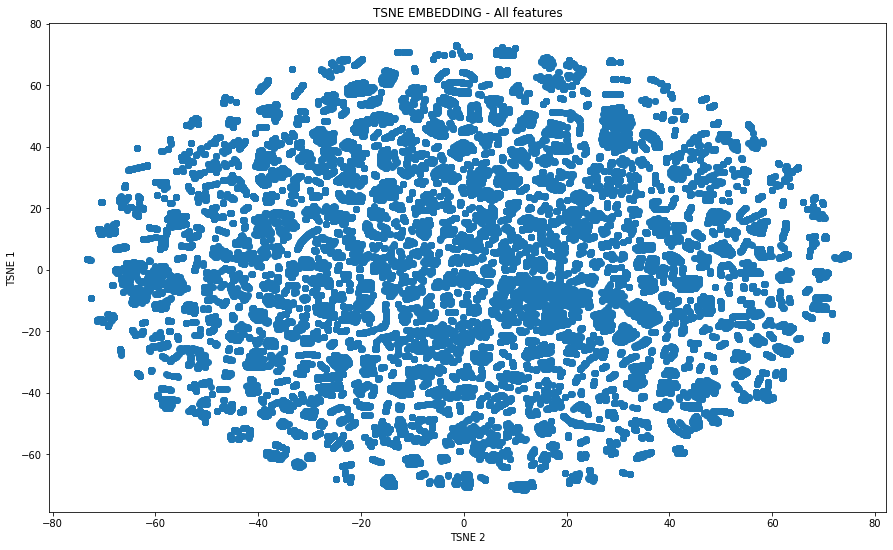

In [65]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_diario[:,0], X_tsne_diario[:,1])
handles, _ = scatter.legend_elements(prop='colors')

### K-Means Clustering

K-Means Clustering
Explorar distintas soluciones de clustering con diferentes parámetros,
como iteraciones, número de clusters o métricas de distancia, y compararlas. 
Finalmente, para el modelo seleccionado:
> Aplicar K-Means tanto al dataset original como al dataset transformado.

* Calcular las métricas pertinentes sobre los clusters resultantes.
* Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
* Agregar al dataset el cluster resultante de los modelos.
* Graficar diferentes variables de interés por cluster y compararlos.

#### SOBRE DF CON PCA (TRANSFORMADO) 

Para n_clusters = 4 El silhouette_score promedio es : 0.2385960327984189
Para n_clusters = 6 El silhouette_score promedio es : 0.1721799924234394
Para n_clusters = 8 El silhouette_score promedio es : 0.16846794396738204
Para n_clusters = 10 El silhouette_score promedio es : 0.17274778973714056
Para n_clusters = 12 El silhouette_score promedio es : 0.18266019427509292
Para n_clusters = 14 El silhouette_score promedio es : 0.10942691769769032
Para n_clusters = 16 El silhouette_score promedio es : 0.11705517403019862


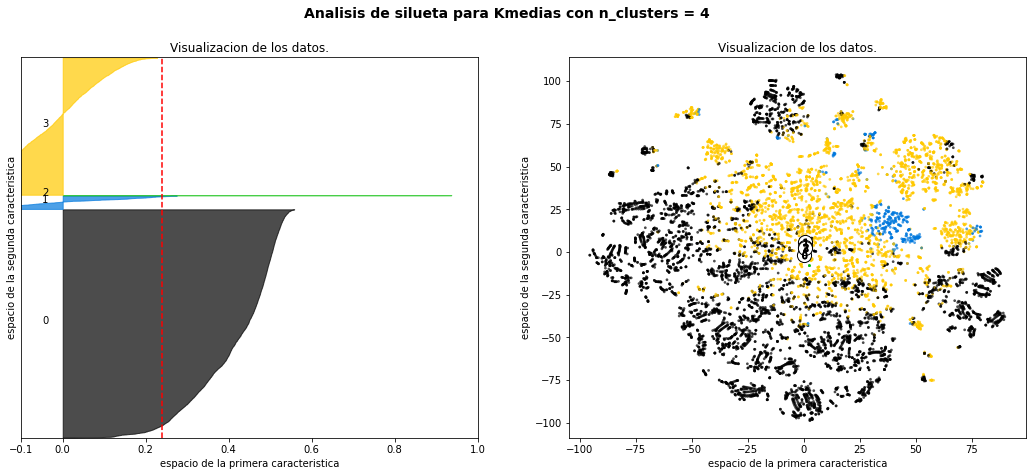

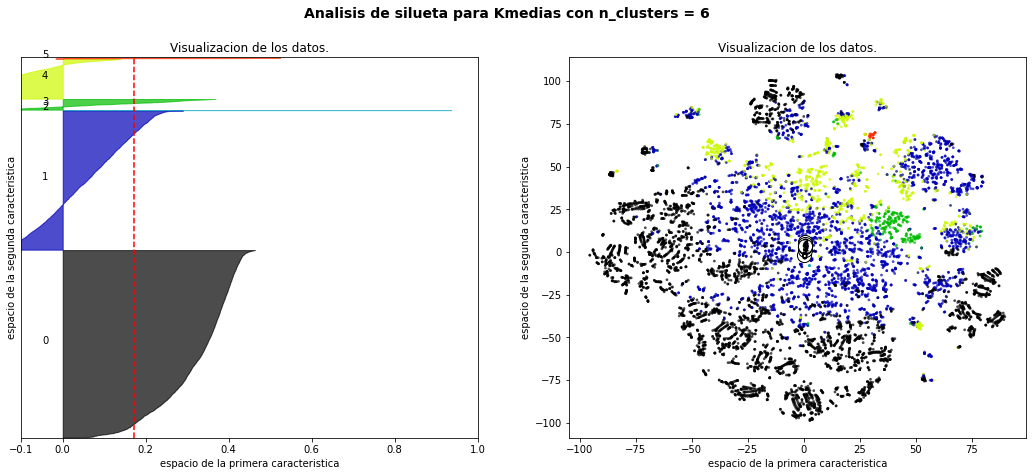

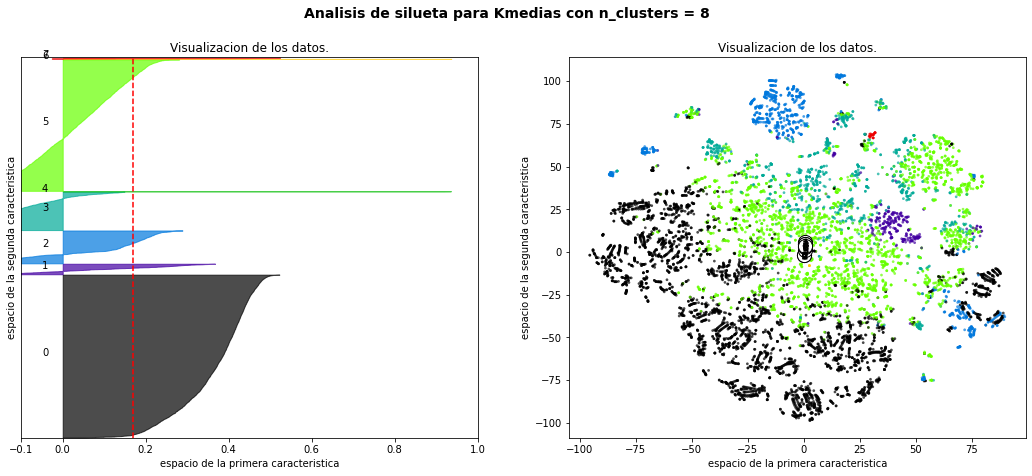

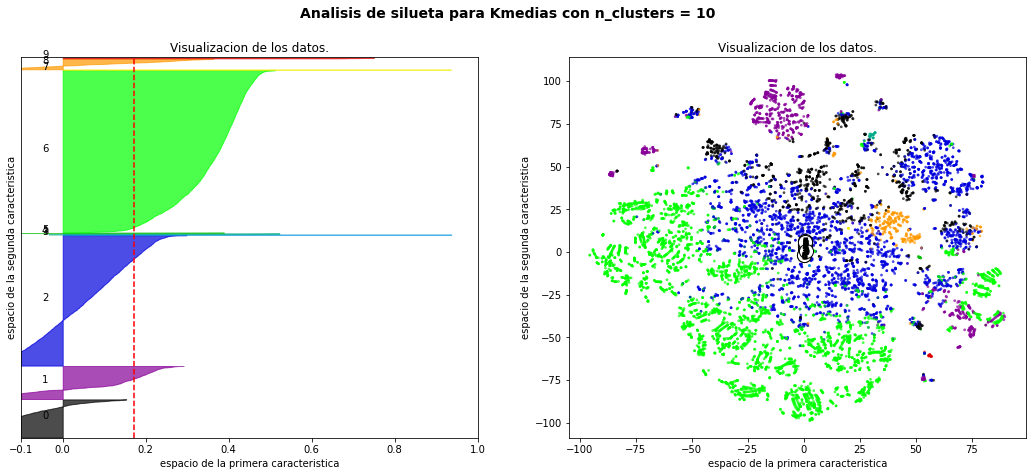

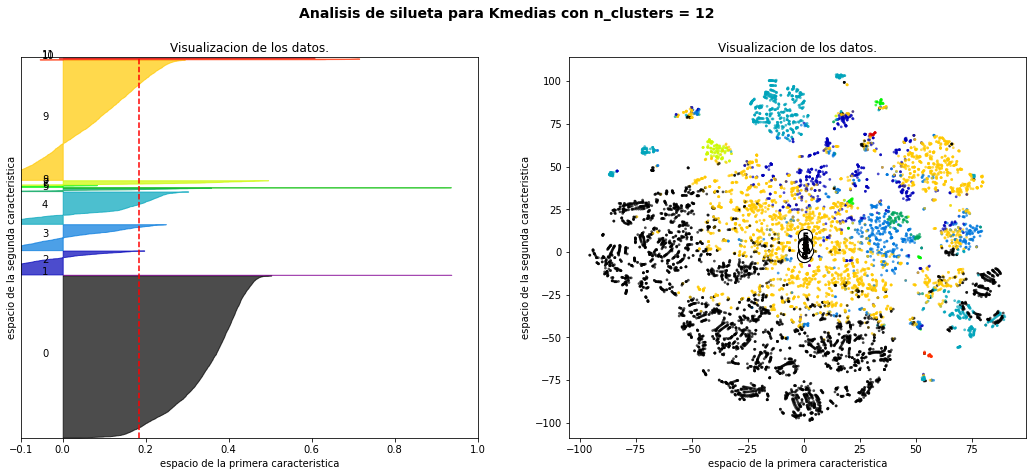

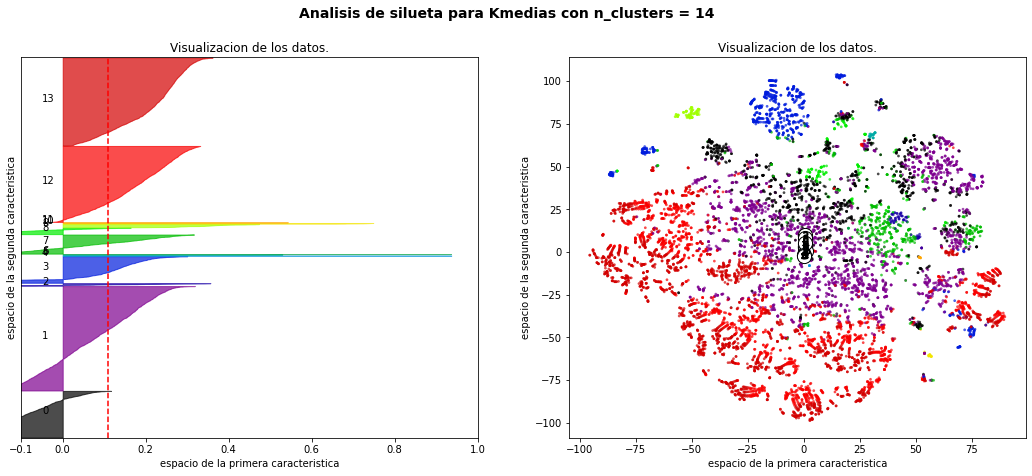

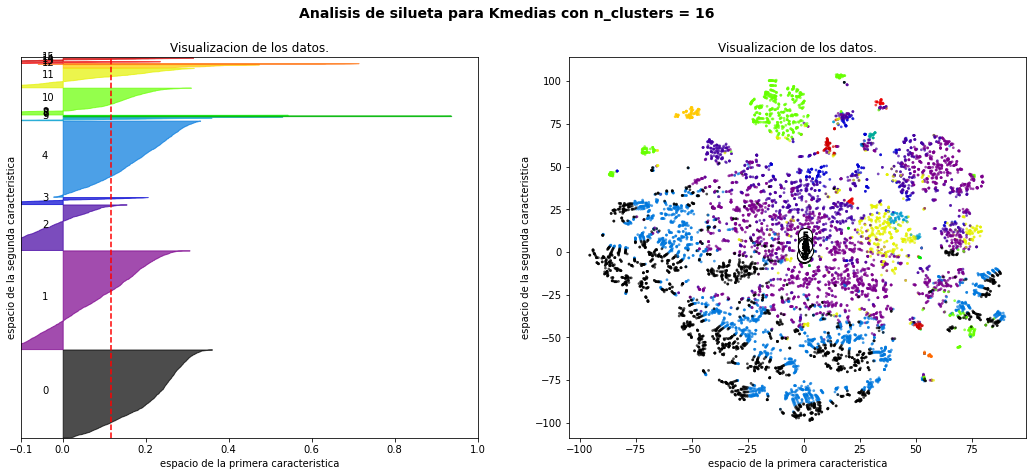

In [60]:
# con DF- PCA
X = df_pca.drop(columns = [dni])

range_n_clusters = [4,6,8,10,12,14,16]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 100 )
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne_all[:, 0], X_tsne_all[:, 1]
                , marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

EN ESTA PARTE VOLVER A INSTANCIAR EL MEJOR MODELO 

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

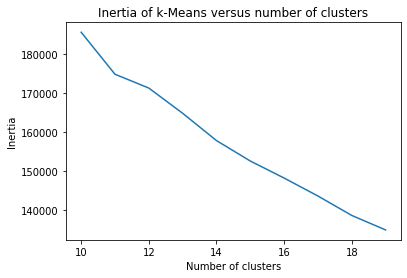

In [38]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 10 a 20 
scores = [KMeans(n_clusters=i, random_state = 28).fit(df_pca.drop(columns = [dni])).inertia_ for i in range(10,20)]

plt.plot(np.arange(10, 20), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [36]:
# Número de clusters buscado
n_clust = 15

km = KMeans(n_clusters=n_clust)
km.fit(df_pca.drop(columns = [dni])) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster(Inertia) ', km.inertia_)

Suma de los cuadrados de las distancias al cluster(Inertia)  153483.86527707335


In [37]:
X = df_pca.drop(columns = [dni])
print('Coeficiente de silueta =', silhouette_score(X, clusters))

Coeficiente de silueta = 0.1131690166673325


In [52]:
df_clusters=df.copy()
df_clusters['cluster_kmeans'] = km.labels_ #clusters
df_clusters.cluster_kmeans.value_counts()

2     2128
5     1658
10    1312
8     1205
1     1024
3      653
6      467
9      419
11     325
0      249
14     203
13     193
7      157
4       99
12      36
Name: cluster_kmeans, dtype: int64

In [53]:
pd.options.display.max_columns = None
df_clusters.groupby(by=['cluster_kmeans','fg_aumentado']).size()

cluster_kmeans  fg_aumentado
0               0                249
1               1               1024
2               0               2128
3               0                653
4               1                 99
5               1               1658
6               0                467
7               1                157
8               0               1205
9               0                419
10              0               1312
11              0                325
12              0                 30
                1                  6
13              1                193
14              0                203
dtype: int64

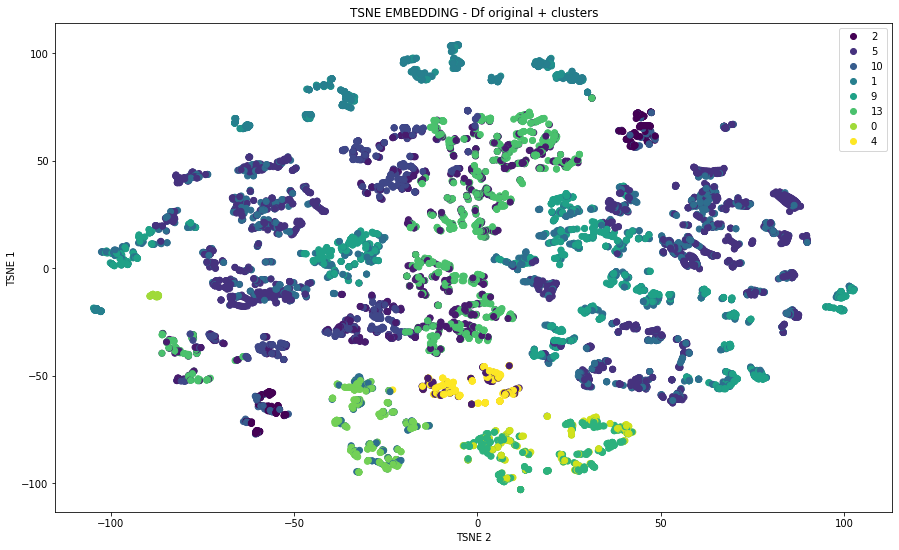

In [55]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - Df original + clusters')
scatter = plt.scatter(X_tsne_all_redux[:,0], X_tsne_all_redux[:,1], c=df_clusters['cluster_kmeans'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_clusters['cluster_kmeans'].unique())

#### SOBRE DF ORIGINAL ESCALADO (SIN PCA)

Para n_clusters = 6 El silhouette_score promedio es : 0.12449761461820642
Para n_clusters = 8 El silhouette_score promedio es : 0.1315130101957449
Para n_clusters = 10 El silhouette_score promedio es : 0.11280404601874695
Para n_clusters = 12 El silhouette_score promedio es : 0.05601483537921516
Para n_clusters = 14 El silhouette_score promedio es : 0.04762506346658778
Para n_clusters = 16 El silhouette_score promedio es : 0.0702466211439251


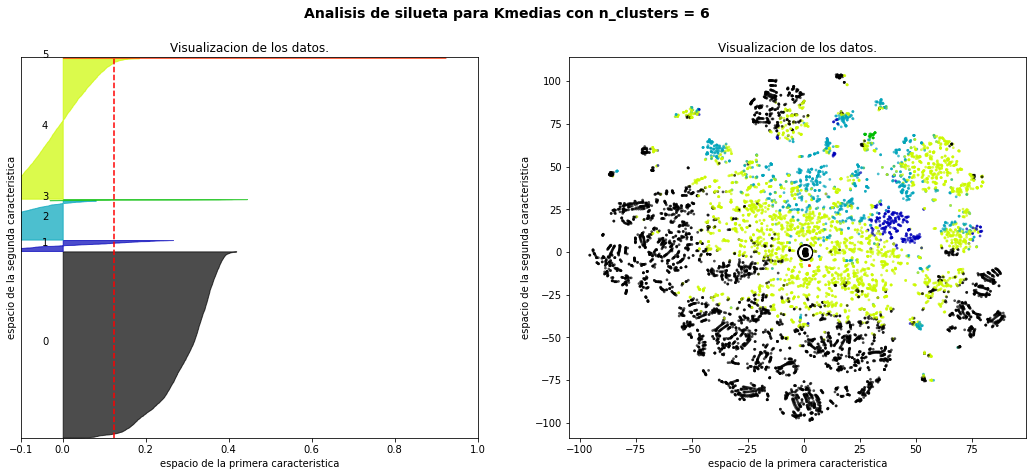

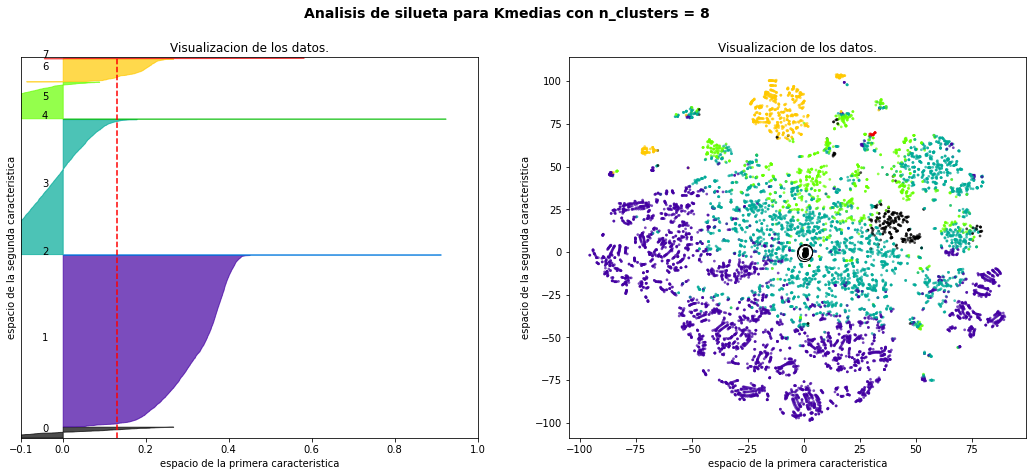

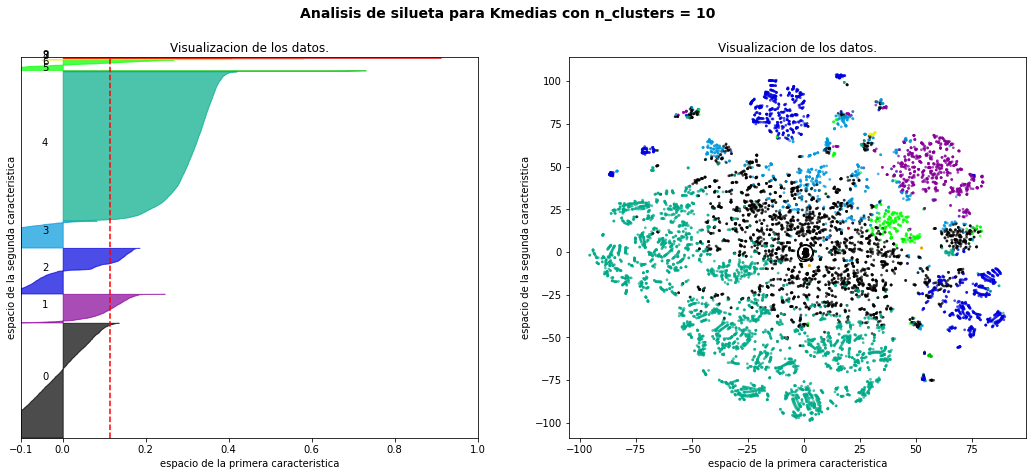

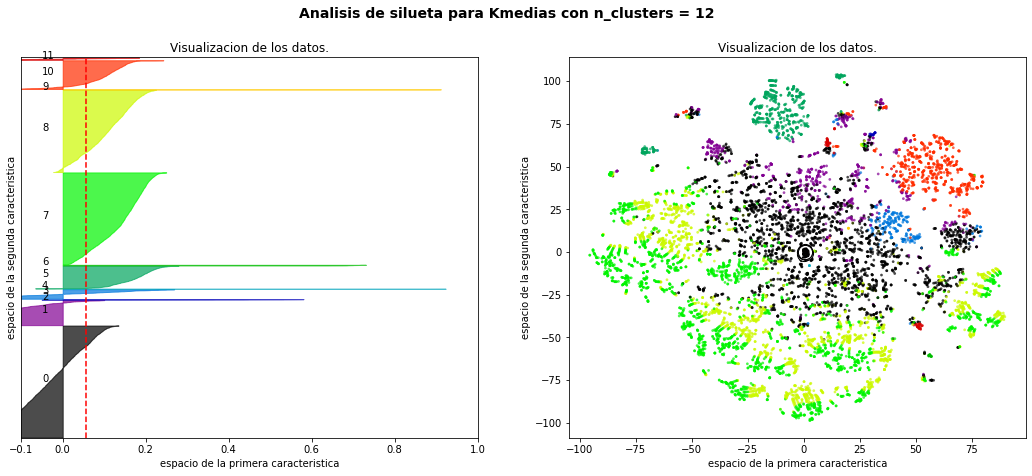

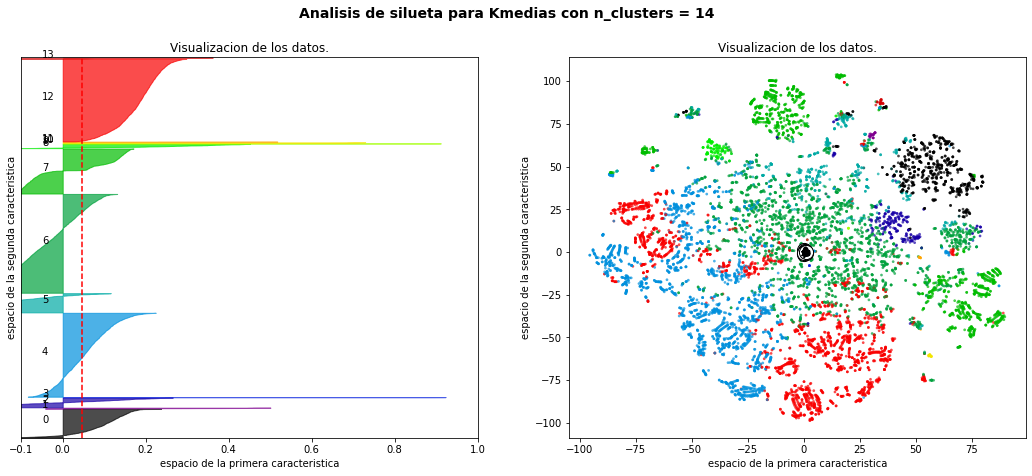

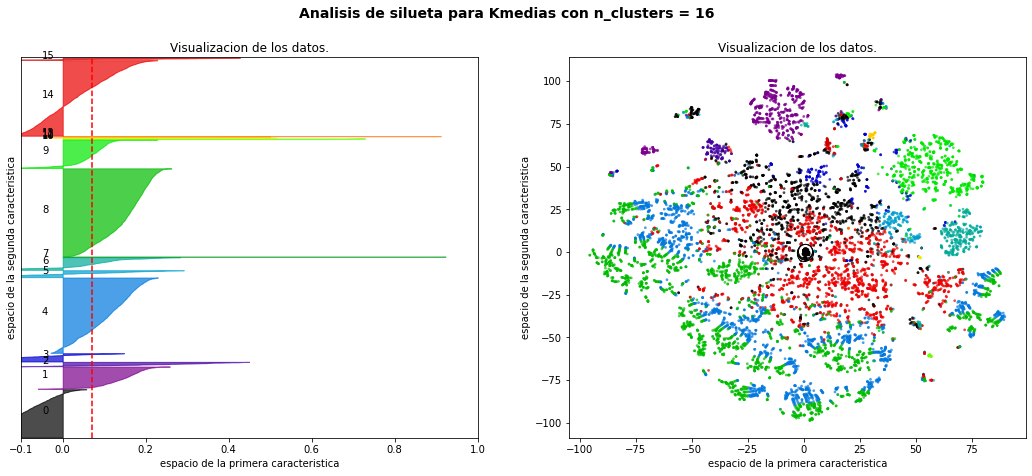

In [47]:
# con DF sin PCA
X = df_escalado.drop(columns=[dni])

range_n_clusters = [6,8,10,12,14,16]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 100 )
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne_all[:, 0], X_tsne_all[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

EN ESTA PARTE VOLVER A INSTANCIAR EL MEJOR MODELO

In [68]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, n_init = 100)
km.fit(df_escalado) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster(Inertia) ', km.inertia_)

Suma de los cuadrados de las distancias al cluster(Inertia)  4705.999079138877


In [69]:
print('Coeficiente de silueta =', silhouette_score(df_escalado, clusters))

Coeficiente de silueta = 0.20339304848317996


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

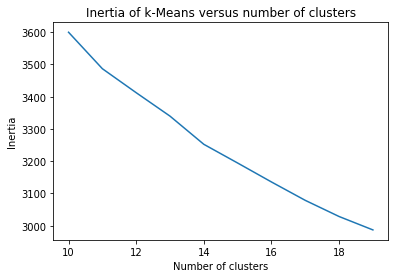

In [70]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i, random_state = 28).fit(df_escalado).inertia_ for i in range(10,20)]

plt.plot(np.arange(10, 20), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [71]:
df_clusters=df.copy()
df_clusters['cluster_kmeans'] = km.labels_ #clusters
df_clusters.cluster_kmeans.value_counts()

3    3311
1    3210
2    2984
0     623
Name: cluster_kmeans, dtype: int64

In [72]:
pd.options.display.max_columns = None
df_clusters.groupby(by=['cluster_kmeans','fg_aumentado']).size()

cluster_kmeans  fg_aumentado
0               0                470
                1                153
1               0               3210
2               1               2984
3               0               3311
dtype: int64

<AxesSubplot:xlabel='monto_ajustado', ylabel='cluster_kmeans'>

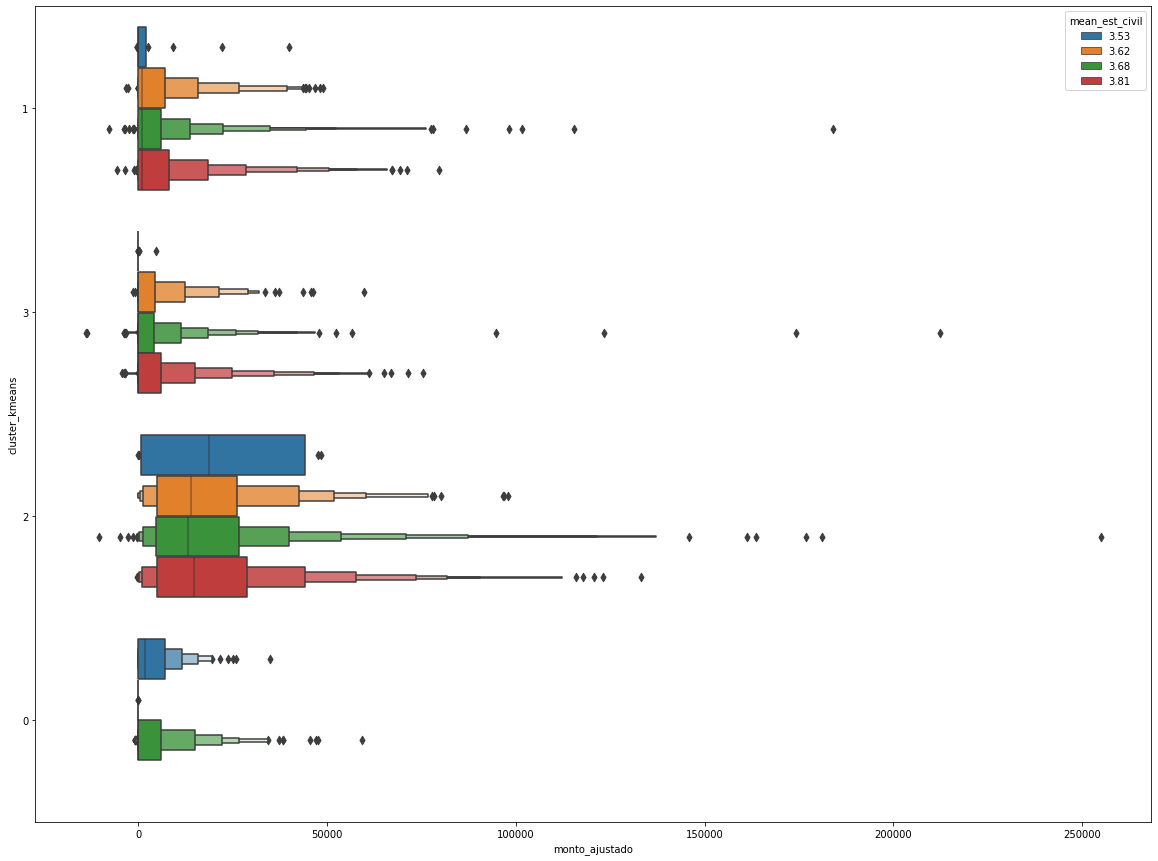

In [73]:
plt.figure(figsize=(20,15))
cluster = df_clusters['cluster_kmeans'].astype(str)
# = df_clusters['cluster_kmeans'].astype(str)
sns.boxenplot(data=df_clusters, x='monto_ajustado', y=cluster, hue='mean_est_civil')

<AxesSubplot:xlabel='monto_ajustado', ylabel='client_antig'>

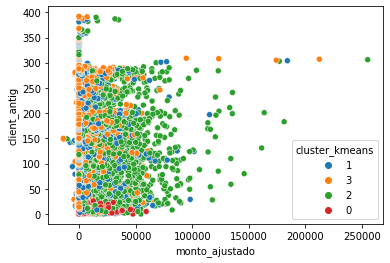

In [74]:
sns.scatterplot(data=df, x='monto_ajustado', y='client_antig', hue=cluster)

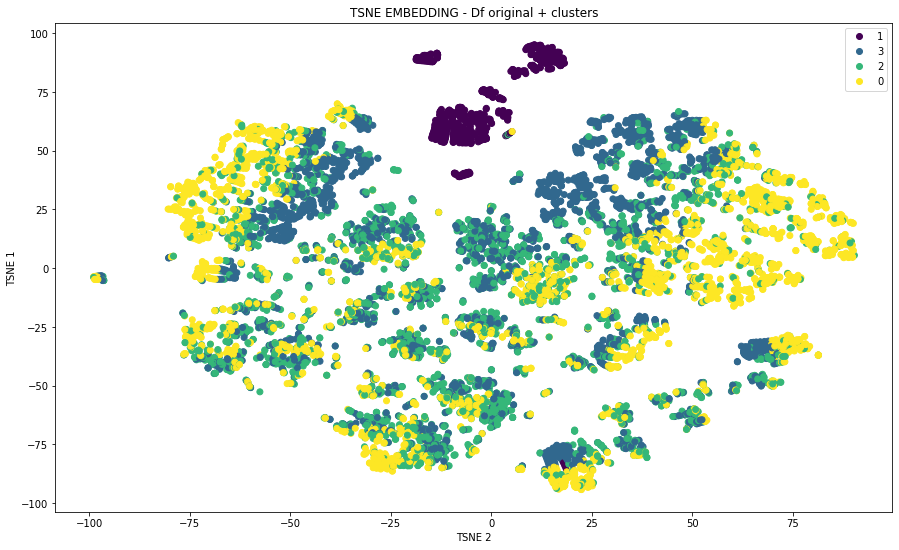

In [76]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - Df original + clusters')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1], c=df_clusters['cluster_kmeans'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_clusters['cluster_kmeans'].unique())

#### SOBRE DF ORIGINAL DIARIO ESCALADO (SIN PCA)

Para n_clusters = 4 El silhouette_score promedio es : 0.1808080405567441
Para n_clusters = 6 El silhouette_score promedio es : 0.18732433788343134
Para n_clusters = 8 El silhouette_score promedio es : 0.19269230048986172
Para n_clusters = 10 El silhouette_score promedio es : 0.2107513442056711
Para n_clusters = 12 El silhouette_score promedio es : 0.23695265707490934
Para n_clusters = 14 El silhouette_score promedio es : 0.2502947465089533
Para n_clusters = 16 El silhouette_score promedio es : 0.27220113588263967


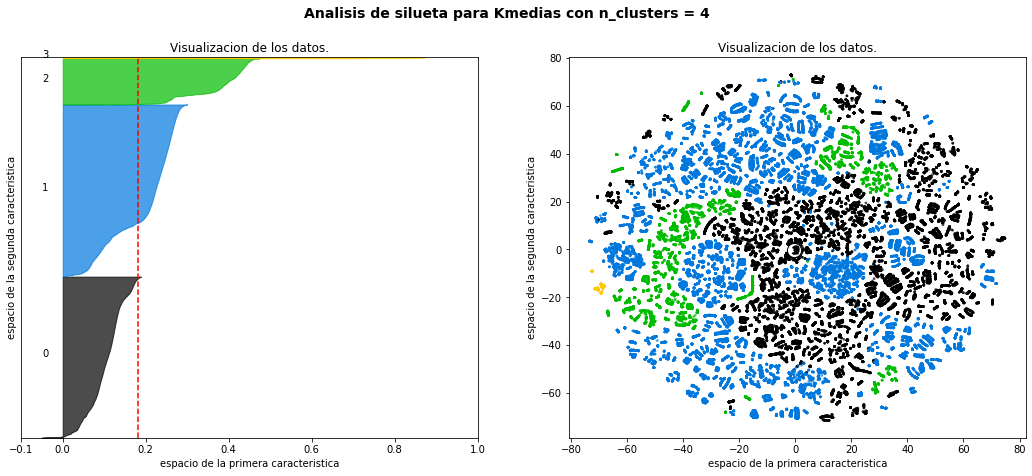

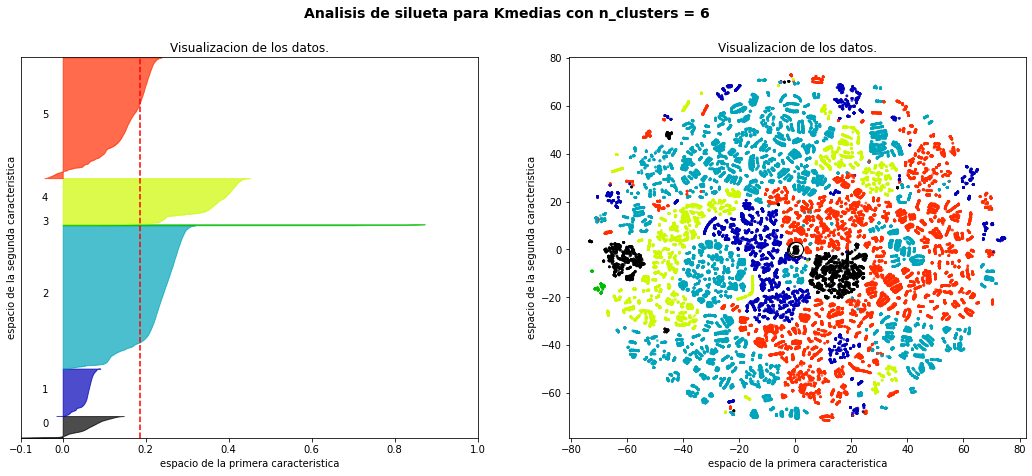

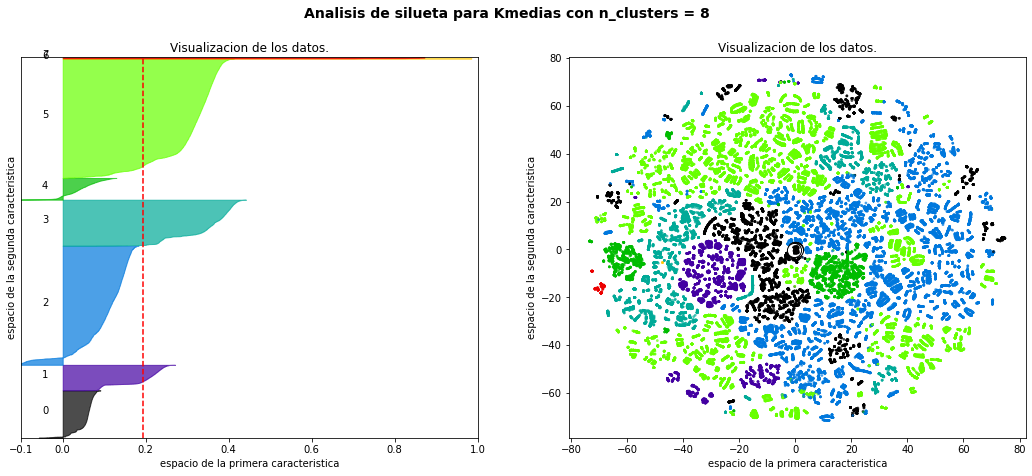

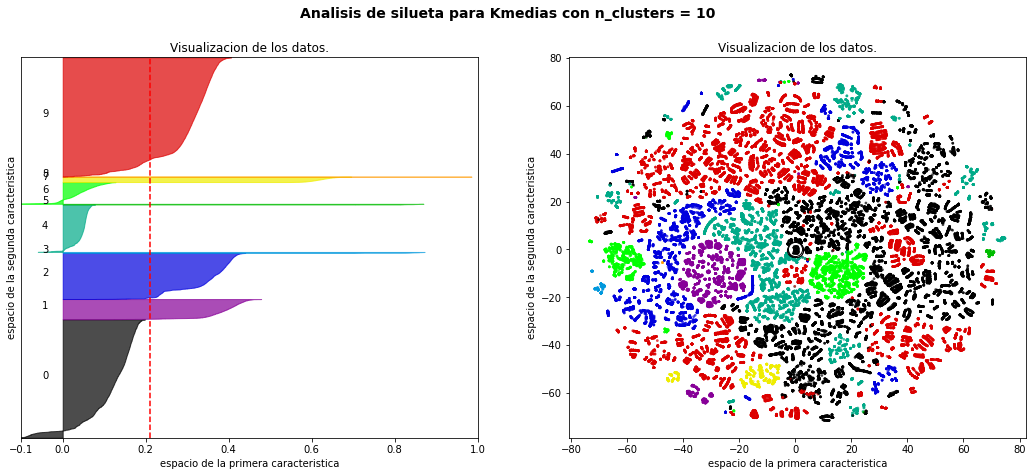

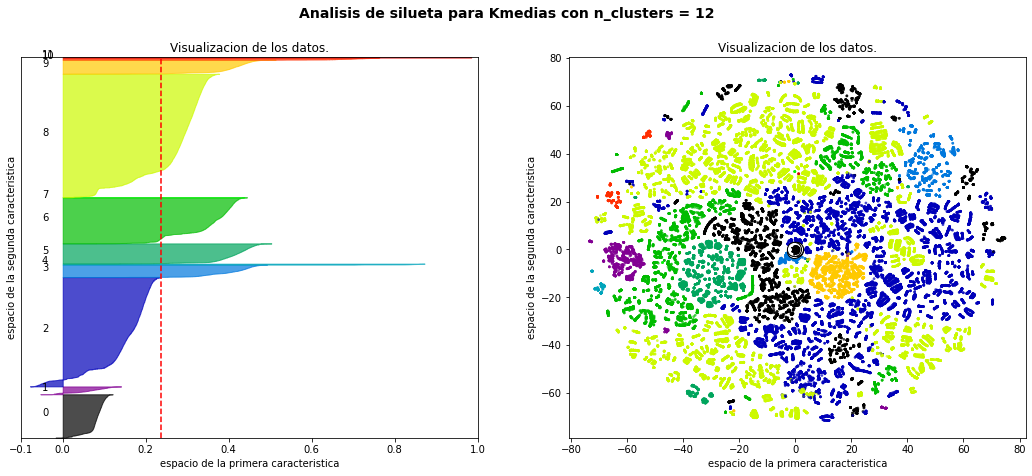

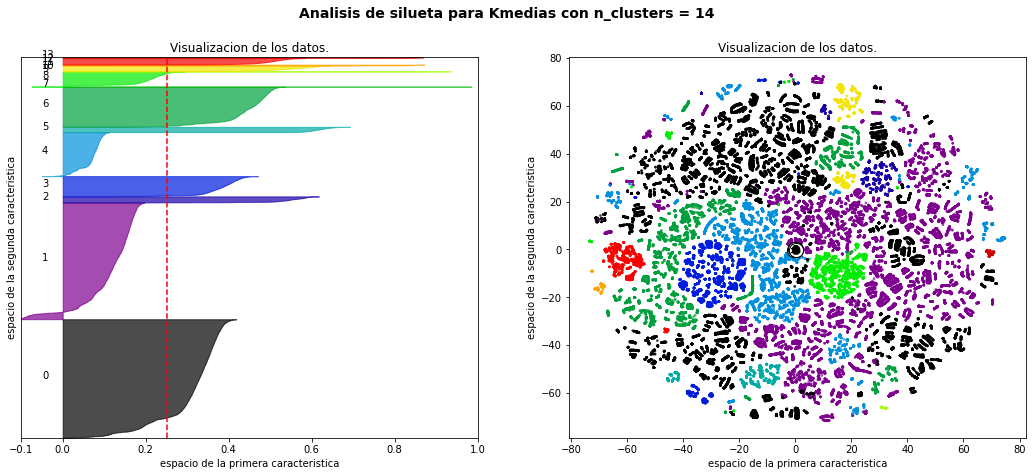

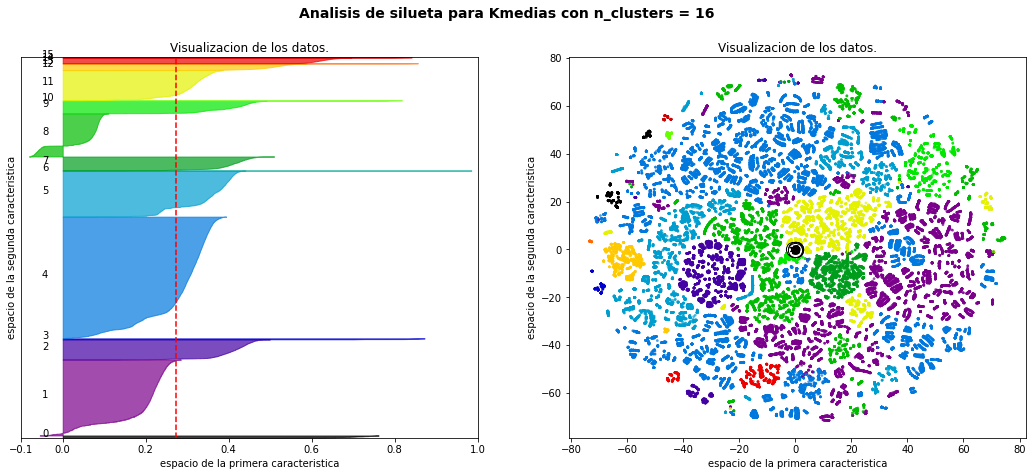

In [66]:
# con DF sin PCA
X = df_escalado_diario.drop(columns=[dni])

range_n_clusters = [4,6,8,10,12,14,16]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 100 )
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne_diario[:, 0], X_tsne_diario[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

#### SOBRE EL DF TSNE

Para n_clusters = 6 El silhouette_score promedio es : 0.39575046
Para n_clusters = 8 El silhouette_score promedio es : 0.40076143
Para n_clusters = 10 El silhouette_score promedio es : 0.3995989
Para n_clusters = 12 El silhouette_score promedio es : 0.4003643
Para n_clusters = 14 El silhouette_score promedio es : 0.39762098
Para n_clusters = 16 El silhouette_score promedio es : 0.39736736


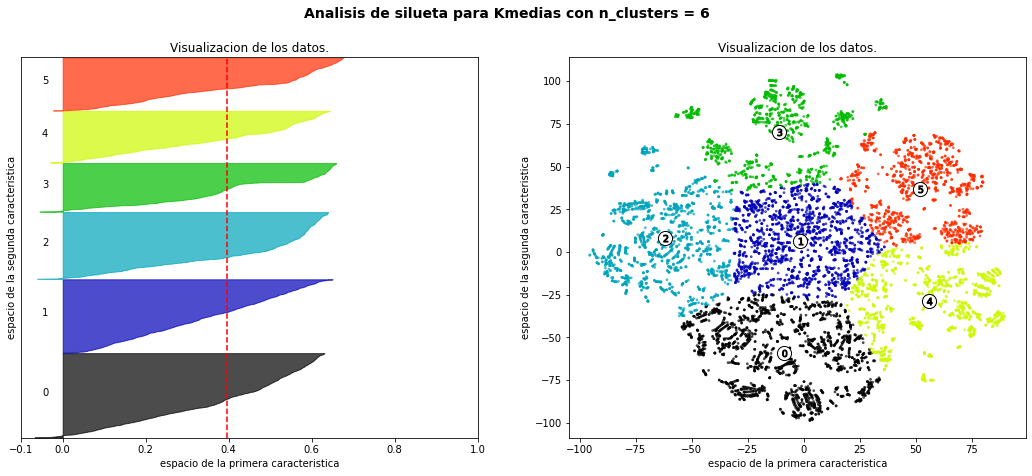

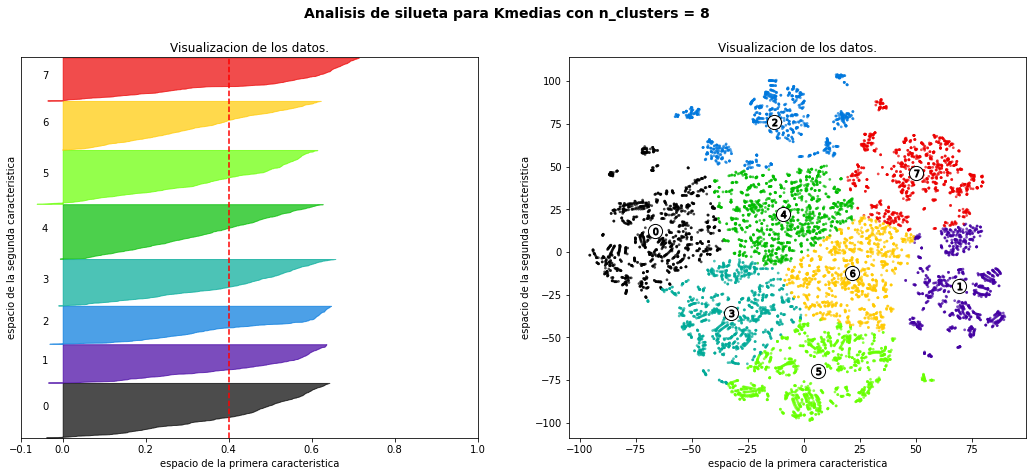

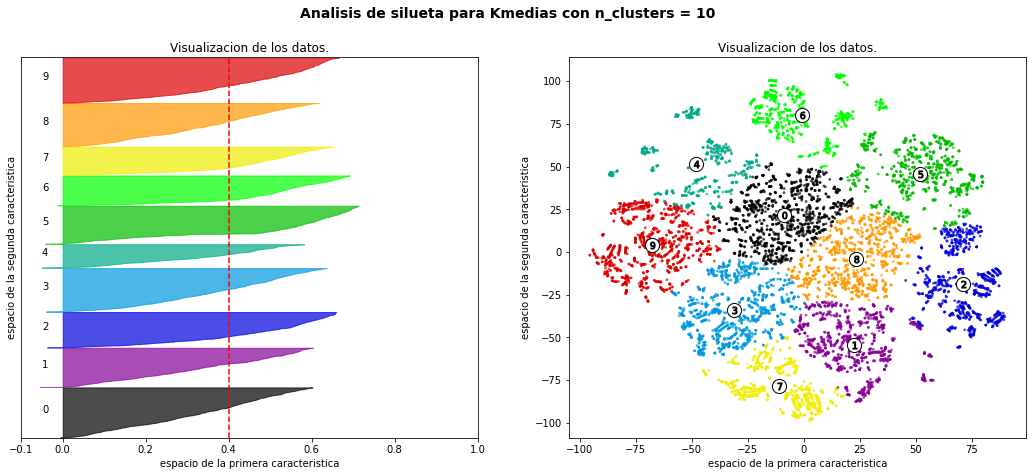

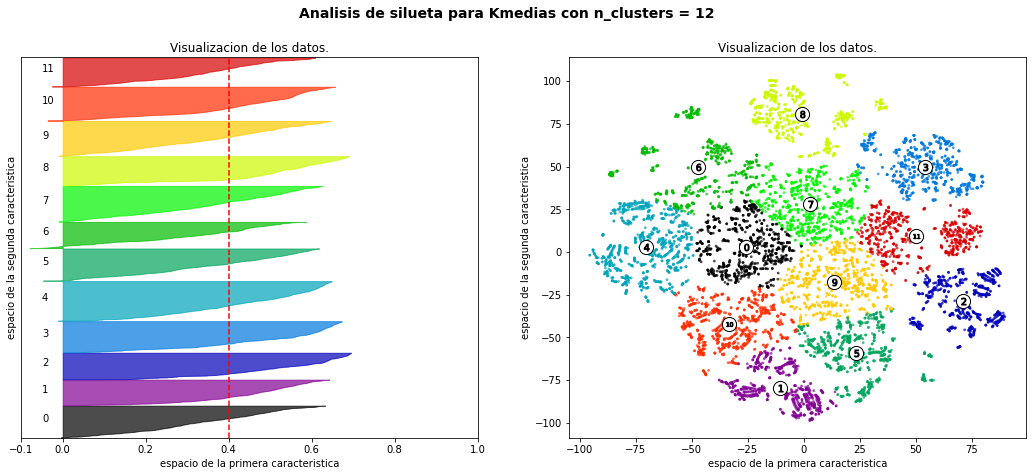

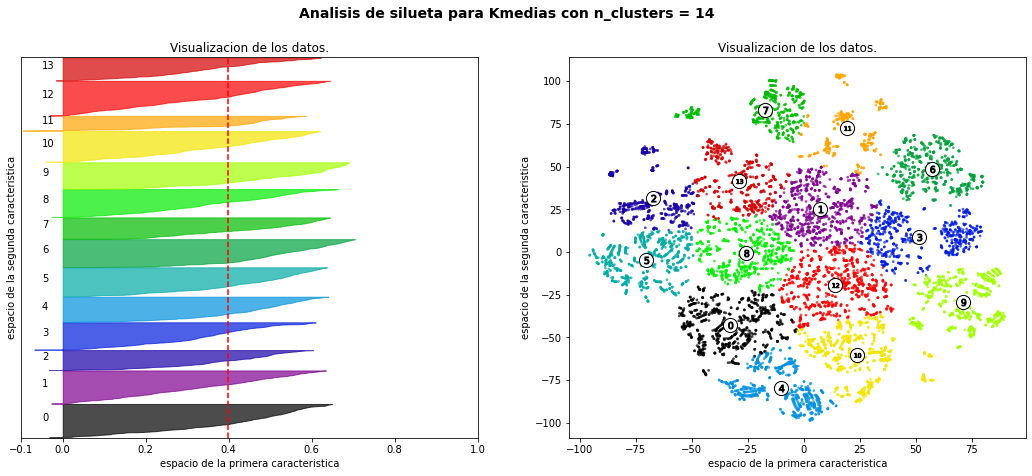

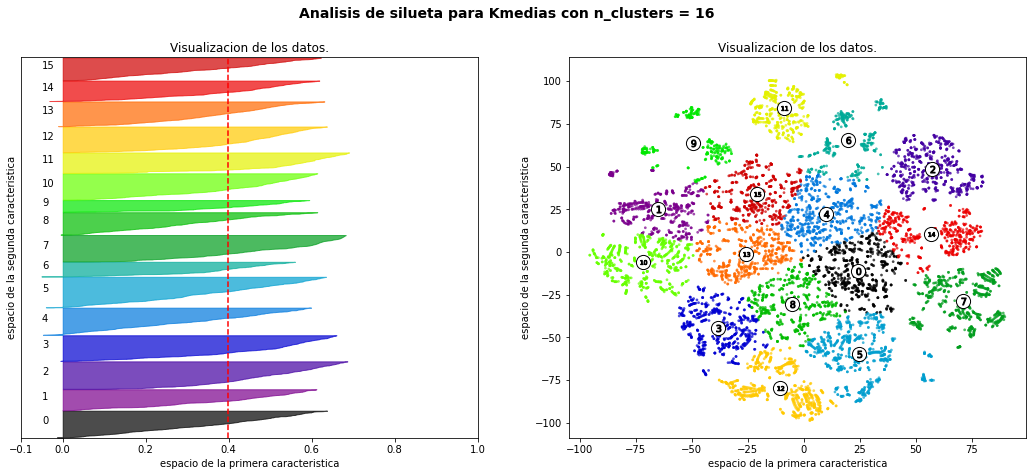

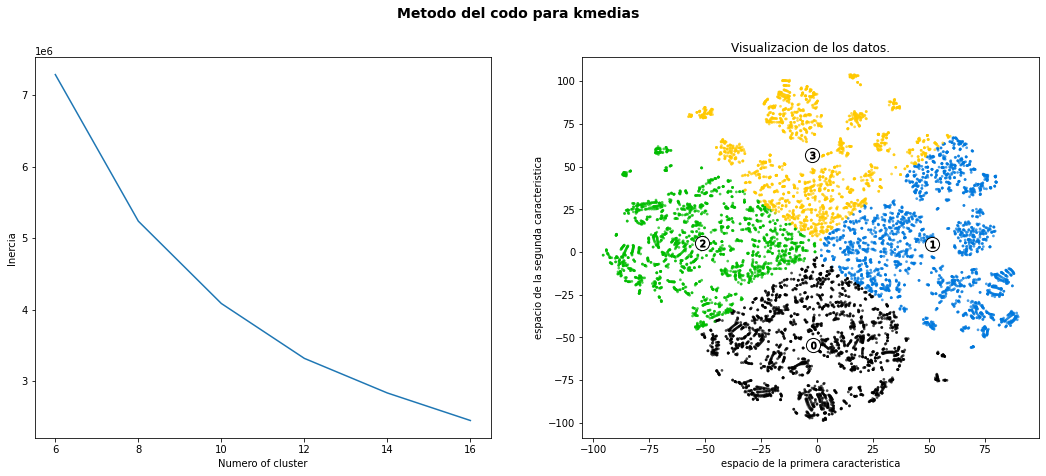

In [48]:
X = X_tsne_all

range_n_clusters = [6,8,10,12,14,16]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [92]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust)
km.fit(X_tsne_all) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster(Inertia) ', km.inertia_)

Suma de los cuadrados de las distancias al cluster(Inertia)  6843362.5


In [93]:
X = X_tsne_all
print('Coeficiente de silueta =', silhouette_score(X, clusters))

Coeficiente de silueta = 0.4005181


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

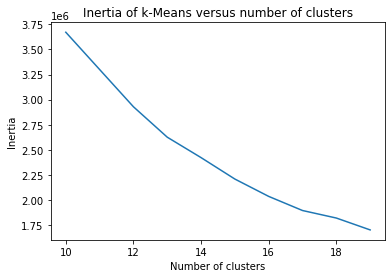

In [94]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i, random_state = 28).fit(X_tsne_all).inertia_ for i in range(10,20)]

plt.plot(np.arange(10, 20), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [95]:
df_clusters=df.copy()
df_clusters['cluster_kmeans'] = km.labels_ #clusters
df_clusters.cluster_kmeans.value_counts()

2    1992
1    1842
0    1735
5    1719
4    1703
3    1137
Name: cluster_kmeans, dtype: int64

In [96]:
pd.options.display.max_columns = None
df_clusters.groupby(by=['cluster_kmeans','fg_aumentado']).size()

cluster_kmeans  fg_aumentado
0               0               1384
                1                351
1               0               1099
                1                743
2               0               1580
                1                412
3               0                668
                1                469
4               0                937
                1                766
5               0               1323
                1                396
dtype: int64

<AxesSubplot:xlabel='monto_ajustado', ylabel='cluster_kmeans'>

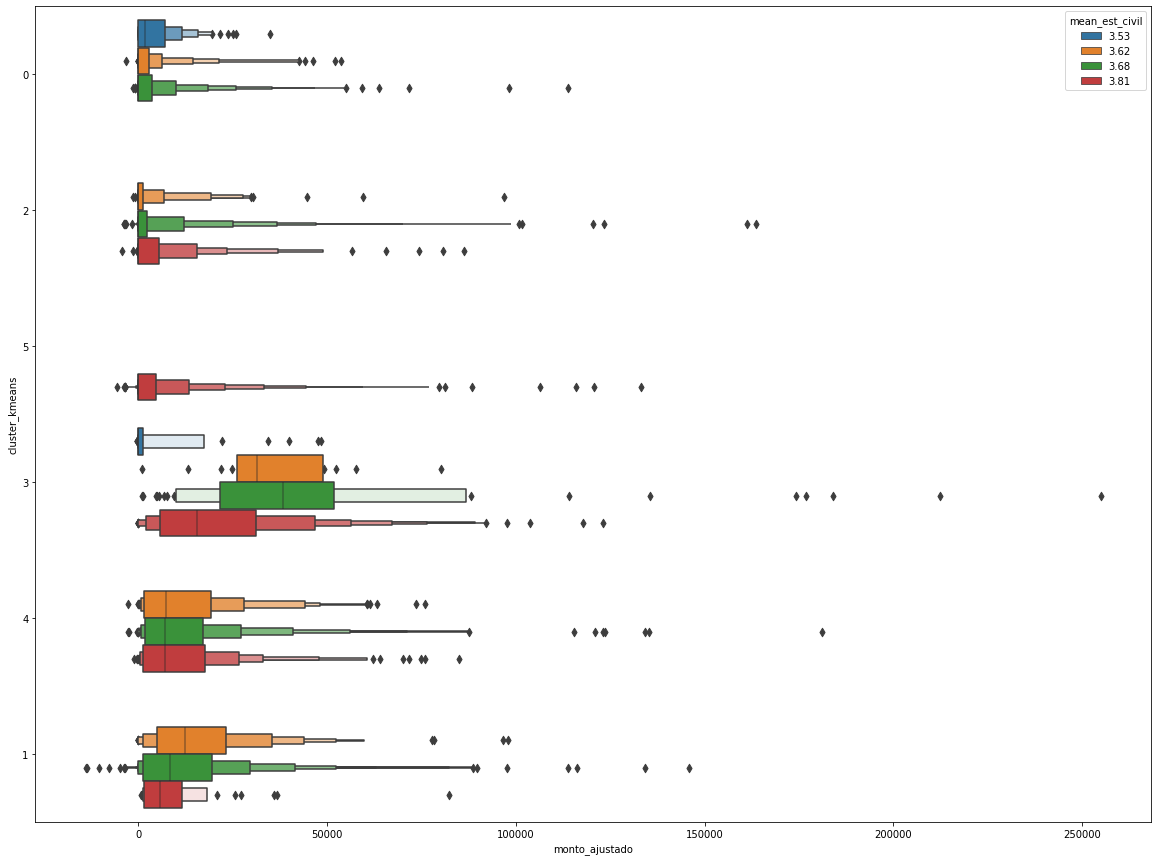

In [97]:
plt.figure(figsize=(20,15))
cluster = df_clusters['cluster_kmeans'].astype(str)
# = df_clusters['cluster_kmeans'].astype(str)
sns.boxenplot(data=df_clusters, x='monto_ajustado', y=cluster, hue='mean_est_civil')

<AxesSubplot:xlabel='monto_ajustado', ylabel='client_antig'>

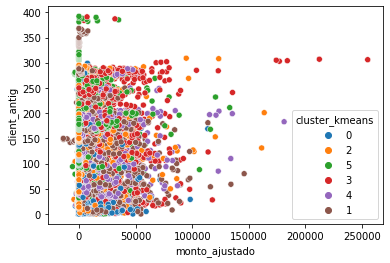

In [98]:
sns.scatterplot(data=df, x='monto_ajustado', y='client_antig', hue=cluster)

### HDBScan Clustering

HDBScan Clustering.
Este algoritmo es de clusterización apropiado para detectar anomalias (outliers).
* comparar los clusters con los del punto anterior usando silhouette Analisys

In [101]:
dbscan = DBSCAN(eps=0.8, min_samples = 10)
dbscan.fit(X_tsne_all)

clusters = dbscan.labels_

In [102]:
print('Coeficiente de silueta =', silhouette_score(X_tsne_all, clusters))

Coeficiente de silueta = -0.6935637


In [103]:
df_clusters_2=df.copy()
df_clusters_2['cluster_dbscan'] = dbscan.labels_ #clusters
df_clusters_2.cluster_dbscan.value_counts()

-1     9175
 4       30
 56      25
 12      24
 44      24
       ... 
 5       10
 68      10
 60      10
 71      10
 69       7
Name: cluster_dbscan, Length: 74, dtype: int64

<AxesSubplot:xlabel='monto_ajustado', ylabel='cluster_dbscan'>

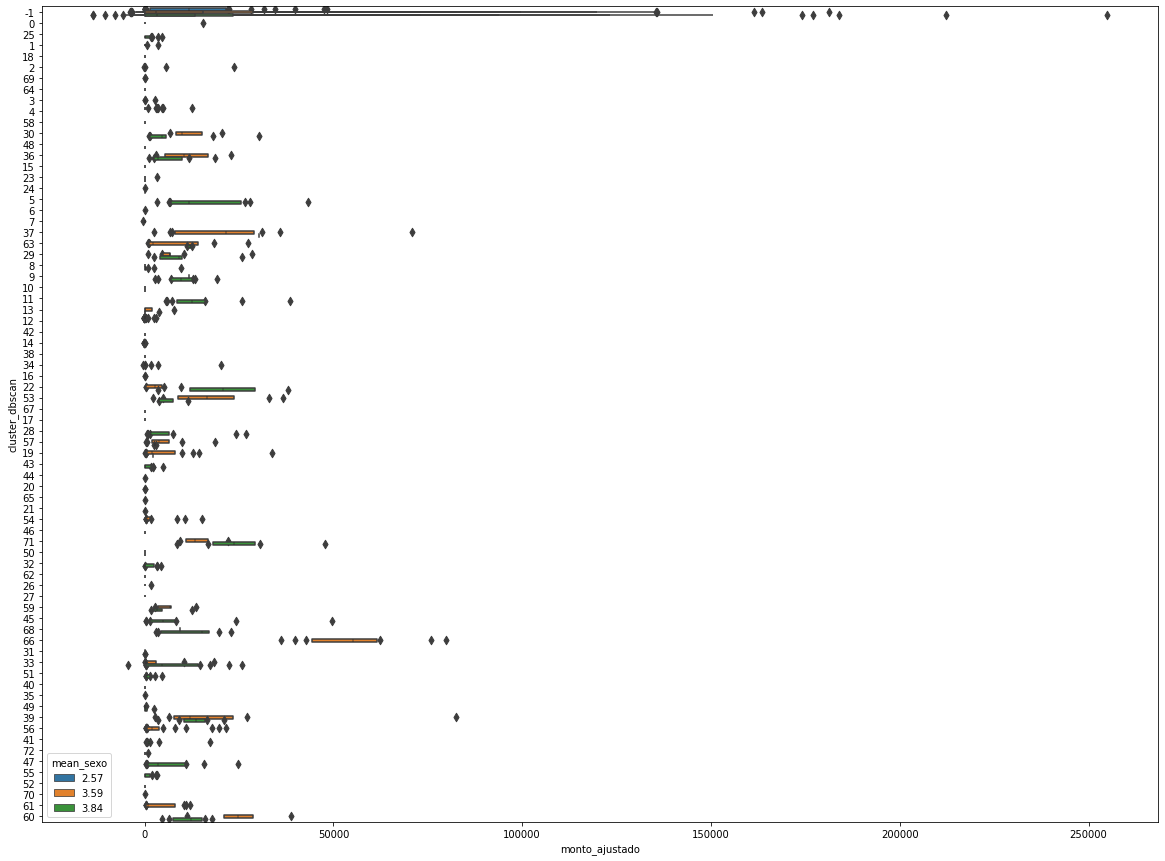

In [104]:
plt.figure(figsize=(20,15))
cluster = df_clusters_2['cluster_dbscan'].astype(str)
# = df_clusters['cluster_kmeans'].astype(str)
sns.boxenplot(data=df_clusters_2, x='monto_ajustado', y=cluster, hue='mean_sexo')

In [105]:
labels_true = df['fg_aumentado']

Estimated number of clusters: 293
Estimated number of noise points: 2703
Homogeneity: 0.146
Completeness: 0.020
V-measure: 0.035
Adjusted Rand Index: -0.011
Adjusted Mutual Information: 0.029
Silhouette Coefficient: -0.115


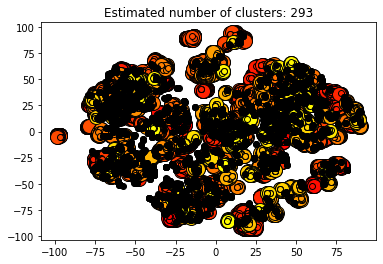

Estimated number of clusters: 6
Estimated number of noise points: 10064
Homogeneity: 0.003
Completeness: 0.032
V-measure: 0.005
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.004
Silhouette Coefficient: -0.191


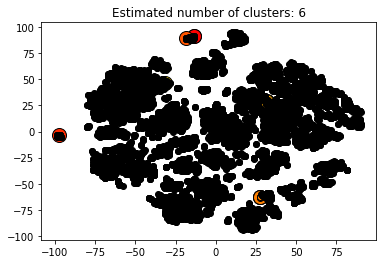

Estimated number of clusters: 42
Estimated number of noise points: 9600
Homogeneity: 0.018
Completeness: 0.028
V-measure: 0.022
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.018
Silhouette Coefficient: -0.379


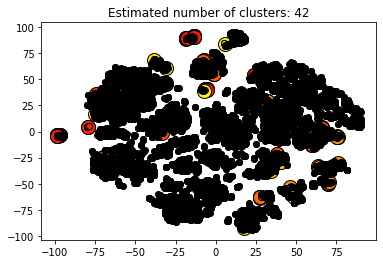

In [106]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X_tsne_all)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_escalado, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_tsne_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_tsne_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
# #############################################################################
# Compute DBSCAN

#EPS = 0.7 
db = DBSCAN(eps=0.5, min_samples=10).fit(X_tsne_all)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_escalado, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_tsne_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_tsne_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# #############################################################################
# Compute DBSCAN

#EPS = 0.8 
db = DBSCAN(eps=0.7, min_samples=10).fit(X_tsne_all)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_escalado, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_tsne_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_tsne_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

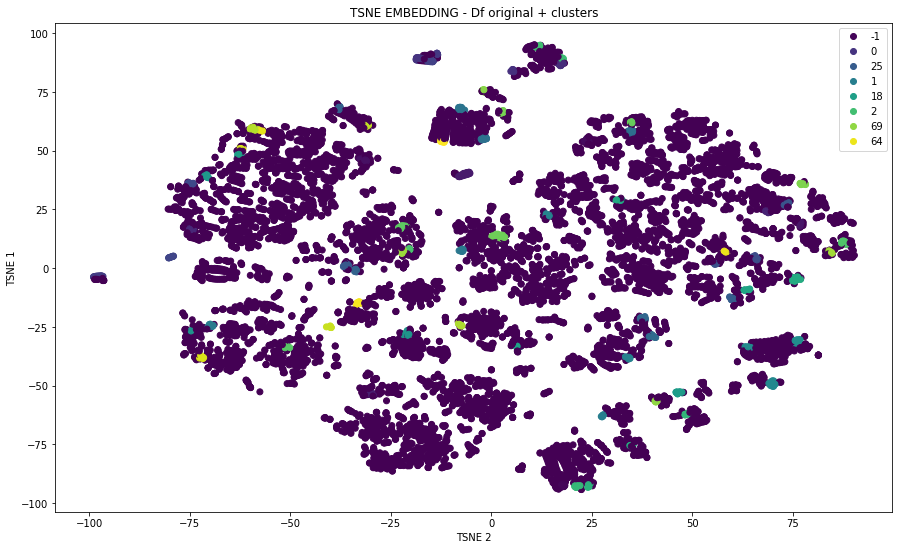

In [107]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - Df original + clusters')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1], c=df_clusters_2['cluster_dbscan'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_clusters_2['cluster_dbscan'].unique())

### K-Means Clustering para Serires Temporales (Lucho)

K-Means Clustering para Serires Temporales (Lucho)
La idea es segmentar a los clientes en base a sus series temporales
usando el monto y la fecha del monto de moviento.
* Usar la libreria [ts-learn](https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html) 


> Agregar al dataset el cluster resultante de los modelos.

La serie temporal se escala usando TimeSeriesScalerMeanVariance. Este scaler provoca que la salida de cada serie temporal tenga media 0 y varianza unitaria. Aqui asumimos que el rango de la serie temporal no aporta informacion y solo queremos comparar las distintas formas independientemente de la variacion de amplitud entre ellas.